# Analysis cross-sectional data

In [67]:
# global imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load cross-sectional data

In [49]:
df = pd.read_csv('cross-sectional-data-with-control-variables.csv', index_col=0)

In [51]:
df.head()

,game,2weeks,nr_reviews,user_avg_grade,user_sentiment_var,critic_avg_grade,critic_sentiment_var,critic_volume,genre,console
0,007-legends-pc,1,1,1.428571,0.549131,26.800000,0.351563,5.0,Action,pc
1,007-legends-playstation-3,1,3,25.000000,0.177060,42.318182,0.619410,22.0,Action,playstation-3
2,007-legends-wii-u,1,0,40.000000,NaN,40.666667,0.080168,3.0,Action,wii-u
3,007-legends-xbox-360,1,1,38.750000,0.741715,46.448980,0.669014,49.0,Action,xbox-360
4,007-quantum-of-solace-pc,1,0,30.000000,0.933805,70.833333,0.542889,18.0,Action,pc


### Check control variables genre & console

In [52]:
df.genre.value_counts()

Action              4898
General             2597
Role-Playing        1066
Sports               927
Action Adventure     926
Miscellaneous        713
Simulation           591
Strategy             409
Arcade               341
Adventure            265
Racing               155
Driving               45
Puzzle                43
Name: genre, dtype: int64

In [53]:
# Only keep instances with a genre that is not null
df = df[~df.genre.isnull()]

In [54]:
len(df)

12976

In [60]:
df.to_csv('cross-sectional-data-with-control-variables.csv', index=False)

In [55]:
df.console.value_counts()

pc                  4212
playstation-4       1086
xbox-360             999
playstation-3        953
playstation-2        938
xbox-one             735
switch               644
wii                  595
ds                   471
3ds                  348
psp                  339
playstation-vita     314
gamecube             313
xbox                 291
game-boy-advance     253
wii-u                193
playstation          146
nintendo-64           77
dreamcast             47
ios                   22
Name: console, dtype: int64

### Summary statistics & visualization

In [56]:
df.describe()

,2weeks,nr_reviews,user_avg_grade,user_sentiment_var,critic_avg_grade,critic_sentiment_var,critic_volume
count,12976.0,12976.000000,12976.000000,4570.000000,11764.000000,11263.000000,11769.000000
mean,1.0,0.856119,71.090629,0.500059,69.978286,0.477436,22.633444
std,0.0,2.633069,26.136245,0.350025,14.067252,0.138891,19.843273
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,60.000000,0.138597,62.400000,0.404349,7.000000
50%,1.0,0.000000,80.000000,0.549141,72.333333,0.489386,17.000000
75%,1.0,1.000000,90.000000,0.760725,80.000000,0.562532,32.000000
max,1.0,146.000000,100.000000,1.409759,100.000000,1.310481,129.000000


In [57]:
counts = df.nr_reviews.value_counts().sort_index()

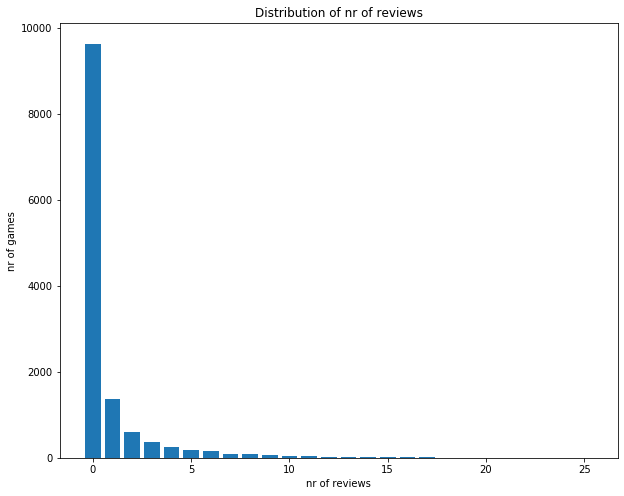

In [59]:
plt.bar(counts.index[:25], counts[:25])
plt.title('Distribution of nr of reviews')
plt.xlabel('nr of reviews')
plt.ylabel('nr of games')
plt.show()

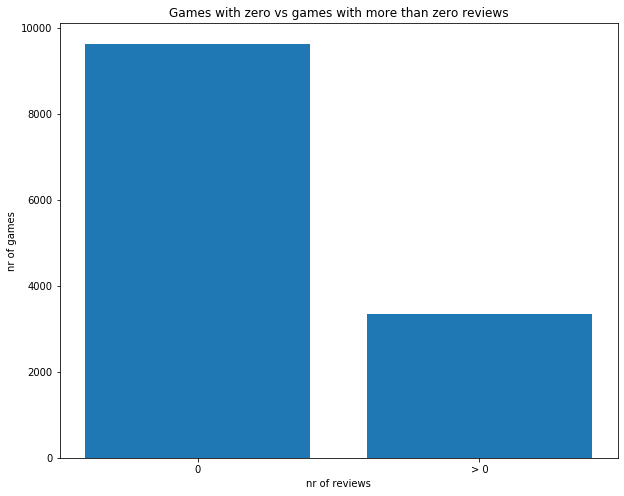

In [72]:
values = ['0', '> 0']
y_pos = np.arange(len(values))

plt.bar(y_pos, (counts[0], sum(counts[counts.index > 0])))
plt.xticks(y_pos, values)
plt.title('Games with zero vs games with more than zero reviews')
plt.xlabel('nr of reviews')
plt.ylabel('nr of games')
plt.show()